In [1]:
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
from astropy import units
plt.rcParams['font.family']=['gothambook','gotham','gotham-book','serif']

clmm.__version__

/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:35: UserWarning: CLMM Backend requested `ccl' is not available, trying others...
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:45: UserWarning: * NumCosmo BACKEND also not available
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:42: UserWarning: * USING cluster_toolkit+astropy BACKEND


'0.9.3'

In [2]:
import clmm.dataops as da
import clmm.galaxycluster as gc
import clmm.theory as theory
from clmm import Cosmology

In [3]:
from clmm.support import mock_data as mock

In [4]:
np.random.seed(11)

In [5]:
cosmo = Cosmology(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)

In [6]:
import random
cluster_m = random.randint(10,100) # Masse grenzen für den Cluster
logm = np.log(cluster_m)/np.log(10)
concentration = random.randint(1,100)
cluster_ra = 0.
cluster_dec = 0.
cluster_z = random.uniform(0.1,0.6)
ngals = random.randint(50,100000) 
cluster_1 = cluster_m, concentration, cluster_ra, cluster_dec, cluster_z, ngals
print(cluster_m)
print(concentration)
print(cluster_z)
print(ngals)
print(cluster_1)

65
75
0.2655103524778465
13092
(65, 75, 0.0, 0.0, 0.2655103524778465, 13092)


In [7]:
import random
import numpy as np
np.set_printoptions(precision=3)   
num = 5
cluster_data = np.zeros((5,6))
for k in range(num):
    cluster_data[k][0] = np.random.randint(10,100) #masse
    cluster_data[k][1] = np.random.randint(1,100)
    cluster_data[k][2] = 0
    cluster_data[k][3] = 0
    cluster_data[k][4] = np.random.uniform(0.1,0.6)
    cluster_data[k][5] = np.random.randint(50,100000)
print(cluster_data)



[[3.500e+01 6.400e+01 0.000e+00 0.000e+00 1.097e-01 9.767e+04]
 [6.500e+01 1.400e+01 0.000e+00 0.000e+00 5.631e-01 4.978e+04]
 [9.200e+01 2.500e+01 0.000e+00 0.000e+00 1.064e-01 2.531e+04]
 [4.200e+01 4.600e+01 0.000e+00 0.000e+00 5.254e-01 6.239e+04]
 [4.400e+01 1.300e+01 0.000e+00 0.000e+00 3.589e-01 8.098e+04]]


In [8]:
ideal_data = []
noisy_data = []
for k in range(5):
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    ideal_data.append( mock.generate_galaxy_catalog(cluster_m , cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1, ngals = ngals)) 
    noisy_data.append( mock.generate_galaxy_catalog(cluster_m, cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1,
                                          shapenoise=0.05, photoz_sigma_unscaled=0.05, ngals=ngals))
    
print(ideal_data)
    

/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarning: divide by zero encountered in true_divide
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarnin

[GCData(cosmo=None, columns: ra, dec, e1, e2, z, ztrue, id), GCData(cosmo=None, columns: ra, dec, e1, e2, z, ztrue, id), GCData(cosmo=None, columns: ra, dec, e1, e2, z, ztrue, id), GCData(cosmo=None, columns: ra, dec, e1, e2, z, ztrue, id), GCData(cosmo=None, columns: ra, dec, e1, e2, z, ztrue, id)]


/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarning: divide by zero encountered in true_divide
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.


In [9]:
gc_object =[]

for k in range(5):
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_ideal"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, ideal_data[k]))
    gc_object[k].save('ideal_GC_'+str(k)+'.pkl')

gc_object =[]

for k in range(5):
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_noisy"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, noisy_data[k]))
    gc_object[k].save('noisy_GC_'+str(k)+'.pkl')


In [10]:
cl_ideal = []
cl_noisy = []
for k in range(5):
    cl_ideal.append (clmm.GalaxyCluster.load('ideal_GC_'+str(k)+'.pkl'))
    cl_noisy.append (clmm.GalaxyCluster.load('noisy_GC_'+str(k)+'.pkl'))
    

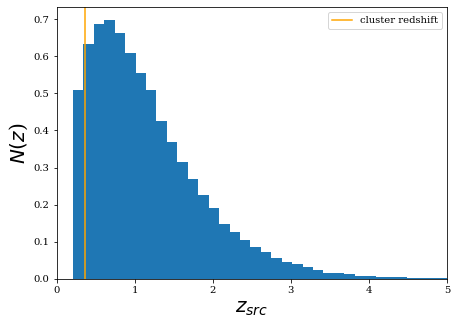

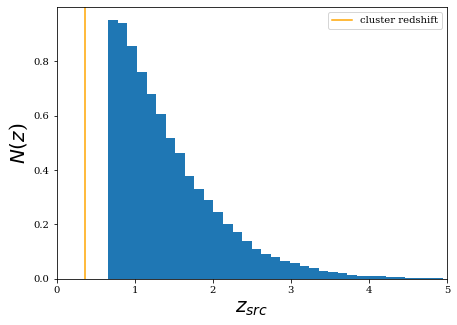

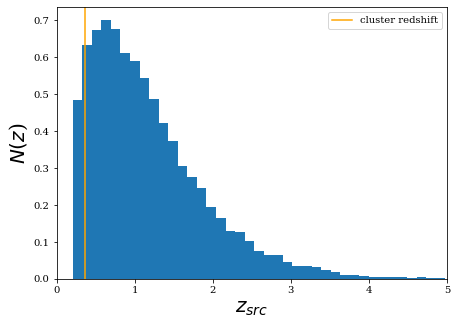

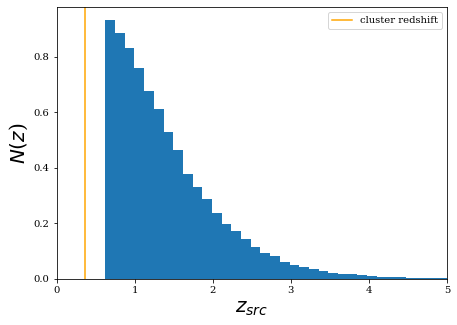

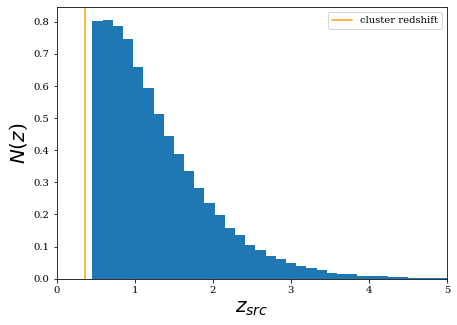

In [13]:
for k in range(5):
    plt.figure(figsize=(7,5))
    plt.hist(cl_ideal[k].galcat['z'], density = True, bins = 50)
    plt.axvline(x = cluster_z, color='orange', label = 'cluster redshift')
    plt.xlabel(r'$z_{src}$', fontsize = 20)
    plt.ylabel(r'$N(z$)', fontsize = 20)
    plt.legend()
    plt.xlim(0,5)
    

In [14]:
for k in range(5):
    cl_ideal[k].compute_tangential_and_cross_components(geometry="flat")
    cl_noisy[k].compute_tangential_and_cross_components(geometry="flat")
pass

In [15]:
bin_edges = da.make_bins(0.2, 4, 15, method='evenlog10width')


In [16]:
for k in range(5):
    cl_ideal[k].make_radial_profile("Mpc", bins=bin_edges, cosmo=cosmo, gal_ids_in_bins=True)
    cl_noisy[k].make_radial_profile("Mpc", bins=bin_edges,cosmo=cosmo, gal_ids_in_bins=True)
pass